In [1]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


**Importing Libraries**

In [2]:
# Bringing in tensorflow
import tensorflow as tf
# Importing tensorflow datasets for fashion mnist
import tensorflow_datasets as tfds
# Importing Matplotlib for visualization
from matplotlib import pyplot as plt

In [3]:
# Using tensorflow datasets api to fetch the data source
ds = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete13QDOG/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete13QDOG/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
ds.as_numpy_iterator().next()['label']

2

***Dataset Visualization***

In [5]:
# Data transformation
import numpy as np

In [6]:
# Data Iterator to call-up Multiple images in batch from data pipeline
dataiterator = ds.as_numpy_iterator()

In [7]:
# Getting data out of the pipeline
dataiterator.next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

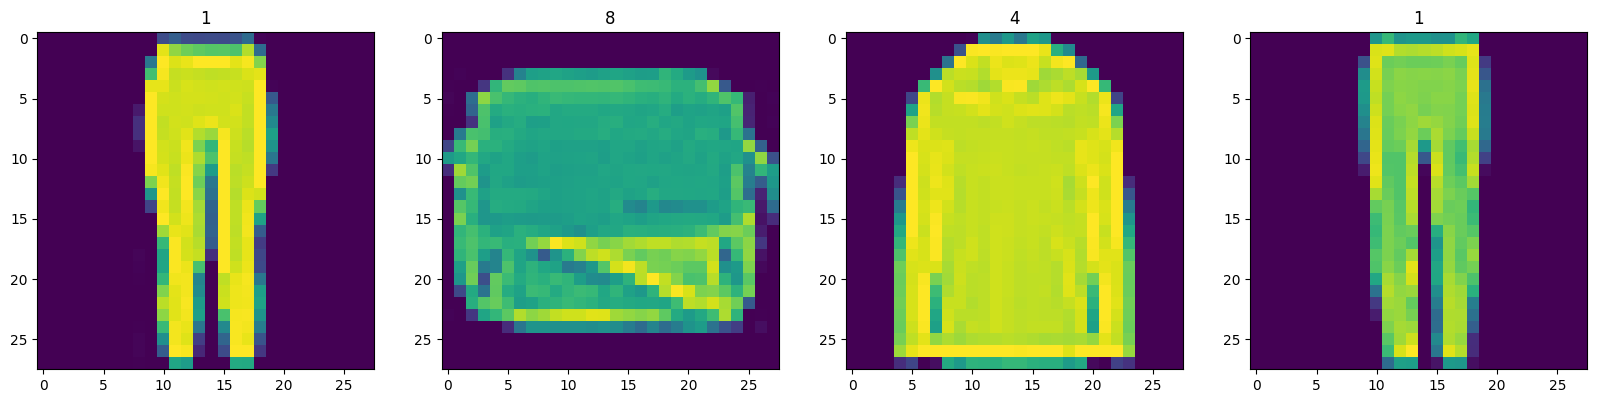

In [8]:
# Subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop * 4 & get images
for idx in range(4):
    # Image grab and label
    sample = dataiterator.next()
    # Image plot using a specific subplot
    ax[idx].imshow(np.squeeze(sample['image']))
    # Title Setup
    ax[idx].title.set_text(sample['label'])

**Image Scaling**

In [9]:
# Scale and return images for faster and efficient training
def scale_images(data):
    image = data['image']
    return image / 255

In [10]:
# Dataset Reload
ds = tfds.load('fashion_mnist', split='train')
# Passing the dataset through the scaling preprocessing method
ds = ds.map(scale_images)
# Cache the dataset for that batch
ds = ds.cache()
# Shuffle
ds = ds.shuffle(60000)
# Batch sizing (128)
ds = ds.batch(128)
# Reduces the likelihood of bottlenecking
ds = ds.prefetch(64)

In [11]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

***Neural Network Design***

In [27]:
# Importing deep learning libraries
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [28]:
#Building Generator
def build_generator():
    model = Sequential()

    # Takes in random values and reshapes it to 7x7x128
    # Generated image initialization
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    # Upsampling block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # Upsampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # Convolutional block 1
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))

    # Convolutional block 2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))

    # Conv layer to get to one channel
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))

    return model

In [29]:
generator = build_generator()

In [30]:
generator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                      

In [31]:
img = generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 19ms/step


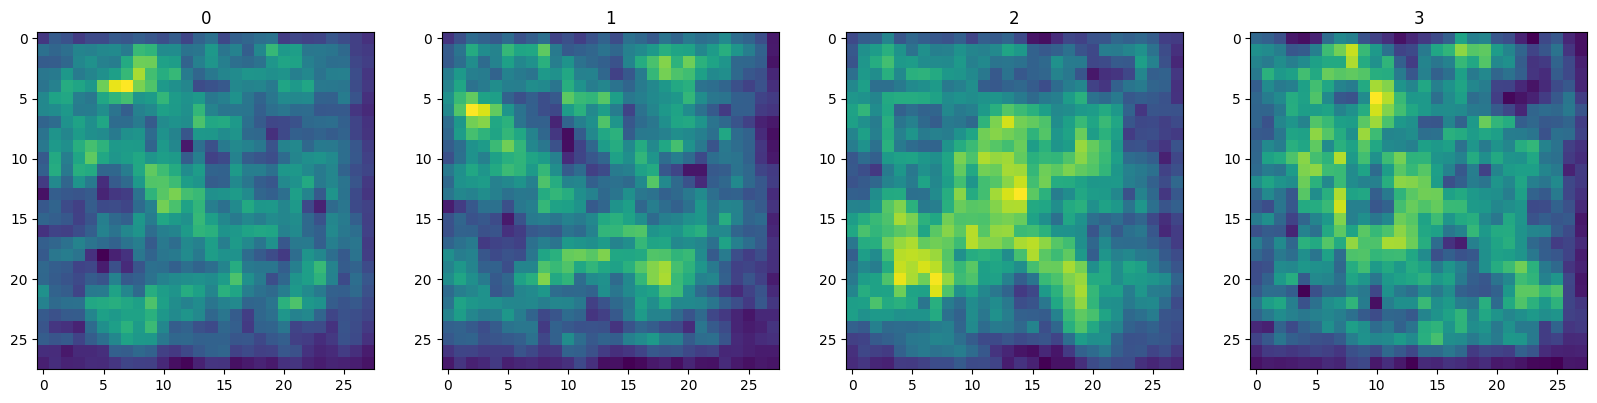

In [32]:
# Generate new images
img = generator.predict(np.random.randn(4,128,1))
# Setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images
for idx, img in enumerate(img):
    # Plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(img))
    # Appending the image label as the plot title
    ax[idx].title.set_text(idx)

In [33]:
#Building Discriminator
def build_discriminator():
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, 5, input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    return model

In [34]:
discriminator = build_discriminator()

In [35]:
discriminator.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_10 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_11 (Dropout)        (None, 20, 20, 64)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 128)      

In [21]:
img = img[0]

In [36]:
img.shape

(28, 28, 1)

In [37]:
discriminator.predict(np.expand_dims(img,0))

1/1 [==============================] - 0s 329ms/step


array([[0.50588834]], dtype=float32)

**DNN Parameter Specification**

In [38]:
# Optimizer setup
# Importing Adam Optimizer
from tensorflow.keras.optimizers import Adam
# Importing binary cross entropy
from tensorflow.keras.losses import BinaryCrossentropy

In [39]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

**Building Subclassed Model**

In [40]:
# Importing the base model class
from tensorflow.keras.models import Model

In [41]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)

        # Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        # Compile with base class
        super().compile(*args, **kwargs)

        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        # Get the data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

        # Train the discriminator
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            # Calculate loss - BINARYCROSS
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        # Apply backpropagation - nn learn
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)

            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)

            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [42]:
# Create instance of subclassed model
fashgan = FashionGAN(generator, discriminator)

In [43]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

**Build Callback**

In [44]:
##import os
##from tensorflow.keras.preprocessing.image import array_to_img
##from tensorflow.keras.callbacks import Callback

In [45]:
##class ModelMonitor(Callback):
    ##def __init__(self, num_img=3, latent_dim=128):
       ## self.num_img = num_img
       ## self.latent_dim = latent_dim

   ## def on_epoch_end(self, epoch, logs=None):
      ##  random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
      ##  generated_images = self.model.generator(random_latent_vectors)
    ##    generated_images *= 255
     ##   generated_images.numpy()
      ##  for i in range(self.num_img):
          ##  img = array_to_img(generated_images[i])
         ##   img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

In [47]:
# Recommend 2000 epochs
#Training of Models
hist = fashgan.fit(ds, epochs=20)

Epoch 1/20
469/469 [==============================] - 88s 159ms/step - d_loss: 0.5288 - g_loss: 0.9720
Epoch 2/20
469/469 [==============================] - 75s 160ms/step - d_loss: 0.3581 - g_loss: 4.1967
Epoch 3/20
469/469 [==============================] - 76s 161ms/step - d_loss: 0.2829 - g_loss: 3.1564
Epoch 4/20
469/469 [==============================] - 77s 164ms/step - d_loss: 0.2742 - g_loss: 2.6409
Epoch 5/20
469/469 [==============================] - 77s 164ms/step - d_loss: 0.2721 - g_loss: 2.6567
Epoch 6/20
469/469 [==============================] - 77s 164ms/step - d_loss: 0.2709 - g_loss: 2.6629
Epoch 7/20
469/469 [==============================] - 77s 164ms/step - d_loss: 0.2704 - g_loss: 2.6620
Epoch 8/20
469/469 [==============================] - 77s 164ms/step - d_loss: 0.2691 - g_loss: 2.6680
Epoch 9/20
469/469 [==============================] - 77s 165ms/step - d_loss: 0.2687 - g_loss: 2.6671
Epoch 10/20
469/469 [==============================] - 77s 165ms/step - d

**Performance Review**

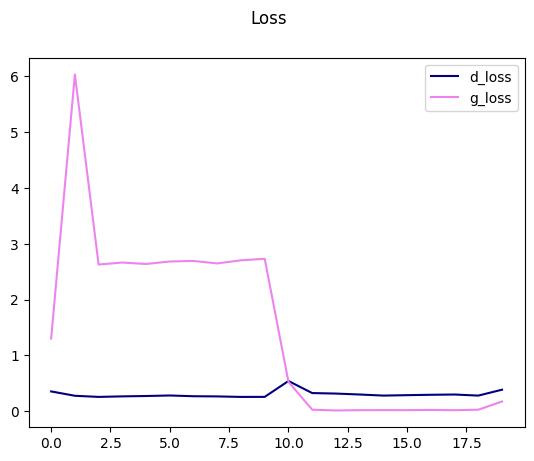

In [48]:
#loss value plot
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label = 'd_loss' , color = 'navy')
plt.plot(hist.history['g_loss'], label = 'g_loss' , color = 'violet')
plt.legend()
plt.show()

In [ ]:
generator.load_weights(os.path.join('archive', 'generatormodel.h5'))

In [ ]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [ ]:
# Save model
generator.save('generator.h5')
discriminator.save('discriminator.h5')